# Assignment #2 - Classification


## <font color="blue"> Name :- Sumedh Joglekar </font> &emsp; &emsp; &emsp;<font color="blue"> Student_ID :- 801084301 </font>

# I. Introduction

An objective of this assignment is to learn different classification methods on the dataset. Firstly, we are supposed to perform a different task such as data pre-processing and data visualization on the selected dataset. Once the data is visualized, we will get more clear information about the distribution of data. In the next step, we are supposed to run below-mentioned algorithms on the data to check the classification result.


Algorithms that need to be implemented in this assignment are:-

1. Pocket Algorithm,
2. QDA(Quadratic Discriminant Analysis)
3. LDA(Linear Discriminant Analysis)
4. Logistic Regression

# II. Data


## 1.  Introduction of data for classification & source

- The dataset contains the historical data on avocado prices and sales volume in multiple US markets from 2015 to 2018.
- The Average Price of avocados in the table reflects a per unit cost, even when multiple avocados units are sold in bags.
- The Product Lookup codes (PLU’s) in the table are only for Hass avocados

### Data Observation:

__Below is the description of the various variables present in the data :__

1. Date - The date of the incident
2. AveragePrice - the average price of a avocado
3. type - conventional or organic
4. year - the year
5. Region - the city or region of the incident
6. Total Volume - Total number of avocados sold
7. 4046 - Total number of avocados with PLU 4046 sold :- Small Hass
8. 4225 - Total number of avocados with PLU 4225 sold :- Large Hass
9. 4770 - Total number of avocados with PLU 4770 sold :- Extra Large Hass

### Source :

https://www.kaggle.com/neuromusic/avocado-prices

## 1. Reading the data

Here I am reading the data from CSV file with the use of pandas read_csv function.

P.S. :- Place the file path in read_csv function while running the code so that csv file will get read.

In [138]:
### Importing the required libraries ####
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from copy import deepcopy as copy 
#########
print("Reading the file :- ")
#print(os.listdir("D:\sum\Its Study Time\Academic\M.S\Spring_2019\Machine Learning\Assignment 3"))
###################
data = pd.read_csv("avocado.csv", encoding='utf-8')# Place the file location here.
data.head(10)

Reading the file :- 


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


## 2. Preprocessing of the data

In order to do the pre-processing task, I have followed below steps:-
1. Check for the null values, if any null data is present either remove the entries(if entries are less in number) or replace the null value with the mean of that category. If any of this method is not suitable then think for other pre-processing tasks.
2. Eliminate irrelevant columns so that the visualization will be easier.
3. Rename the column names of PLU's with the bag size so that data interpretation can be more convenient.
4. Separated out the 'date' column into 'year' as it will be easy to visualize the data distribution over different years.
5. Initial observation, it was found that there is an overlapping of the data in the given dataset and hence removed the overlapping entries from the dataset.

In [139]:
# Pre Processing the data.. Splitting the column Date and taking out only year from it ########
################# 1. Checking for thr null Values ################
print(data.isnull().sum())
################# 2. Dropping unwanted column Unnamed ################
data.rename( columns={'Unnamed: 0':'new column name'}, inplace=True )
data = data.drop('new column name', axis=1)
################# 3. Renaming the columns so that visualization will be more convinient ################
data = data.rename(index=str, columns={"4046" : "Small_Hass", "4225" : "Large_Hass", "4770" : "XLarge_Hass"})
data.head()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


,Date,AveragePrice,Total Volume,Small_Hass,Large_Hass,XLarge_Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [140]:
########### 4.Separating out Year from  Date column ########### 
data
new_data = data["Date"].str.split("-", n = 2, expand = True) 
data["Year"] = new_data[0]
data.drop(columns=["Date"], inplace = True)
data.head()
#new_data

,AveragePrice,Total Volume,Small_Hass,Large_Hass,XLarge_Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015


### Note :-
After observing the data, it is found that there is overlapping between data, e.g there is a data of California as well as SanFrancisco. We need to remove the overlapping data to have correct visualization. Hence removing overlapping data by dropping certain rows.

In [141]:
############ 5. Removing the overlapping data. #############
regionsToDrop = ['California', 'GreatLakes', 'Midsouth', 'NewYork', 'Northeast', 'SouthCarolina', 
                   'Plains', 'SouthCentral', 'Southeast', 'TotalUS', 'West']
data = data[~data.region.isin(regionsToDrop)] # Taking compliment of data not present in regionsToDrop
data.head()

,AveragePrice,Total Volume,Small_Hass,Large_Hass,XLarge_Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015


## 3. Visualization of the data


Taking 5 cities and checking the pattern in which the prices are increased. To do that plotting the line graph for all years with average price.

Top 5 Contries:- 
----------------
HartfordSpringfield
SanFrancisco
Philadelphia
Sacramento
Charlotte


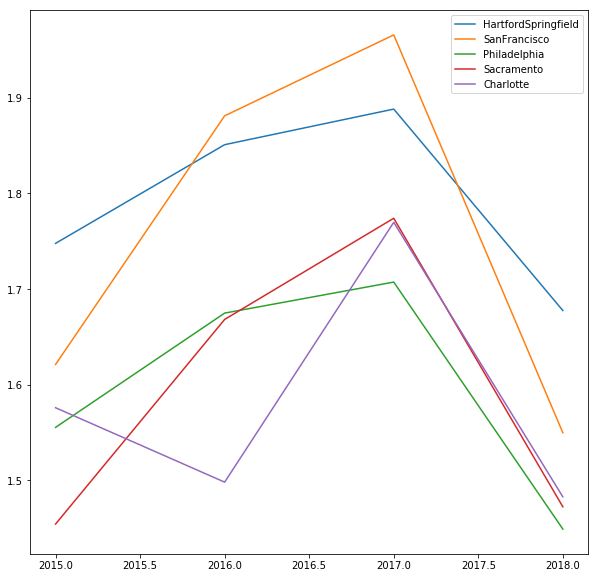

In [142]:
############ Average Price of Avocado According to the Year for top 5 highest average prices ##########
area_list=list(data.region.unique())
unique_years = list(data.year.unique())
area_averageprice_ratio=[]
for i in area_list:
    x=data[data['region']==i]
    area_averageprice_rate=sum(x['AveragePrice'])/len(x)
    area_averageprice_ratio.append(area_averageprice_rate)
#area_averageprice_ratio = sorted(area_averageprice_ratio,reverse=True)
#print(area_averageprice_ratio)
df=pd.DataFrame({'area_list':area_list,'area_averageprice_ratio':area_averageprice_ratio})
new_index=df['area_averageprice_ratio'].sort_values(ascending=False).index.values
sorted_data=df.reindex(new_index)
#print(sorted_data.area_list[int(sorted_data.index[0])])
plt.figure(figsize=(10,10))
test1=[]
print("Top 5 Contries:- ")
print("----------------")
for i in range(0,5):
    avg_column_cali= data[data["region"]==sorted_data.area_list[int(sorted_data.index[i])]]
    print(sorted_data.area_list[int(sorted_data.index[i])])
    #avg_column_cali = data[data["region"]==area_list[i]]                              
    #print(avg_column_cali)
    avg_per_year_cali = avg_column_cali.groupby('year').aggregate('mean')
    #data.year
    #print(avg_per_year_cali.AveragePrice)
    test1.append(sorted_data.area_list[sorted_data.index[i]])
    plt.plot(unique_years,avg_per_year_cali.AveragePrice)
    plt.legend(sorted_data.area_list[int(sorted_data.index[i])])
plt.legend(test1)
plt.show()

### Observation:-

1. Above Graph shows average prices during each year. 
(Here I have taken the graph of 5 cities whose average price cost of avocado was maximum)
2. From the above graph, it can be inferred that the avocado prices were increased substantially in the year 2017.
3. This price rise was mainly due to the low supply and high demand. 
(Source:- https://money.cnn.com/2017/09/09/news/economy/avocado-prices-soar/index.html)
4. Again in 2018, the prices of Avocado dropped below.


Text(0.5, 1.0, 'Average Price/States')

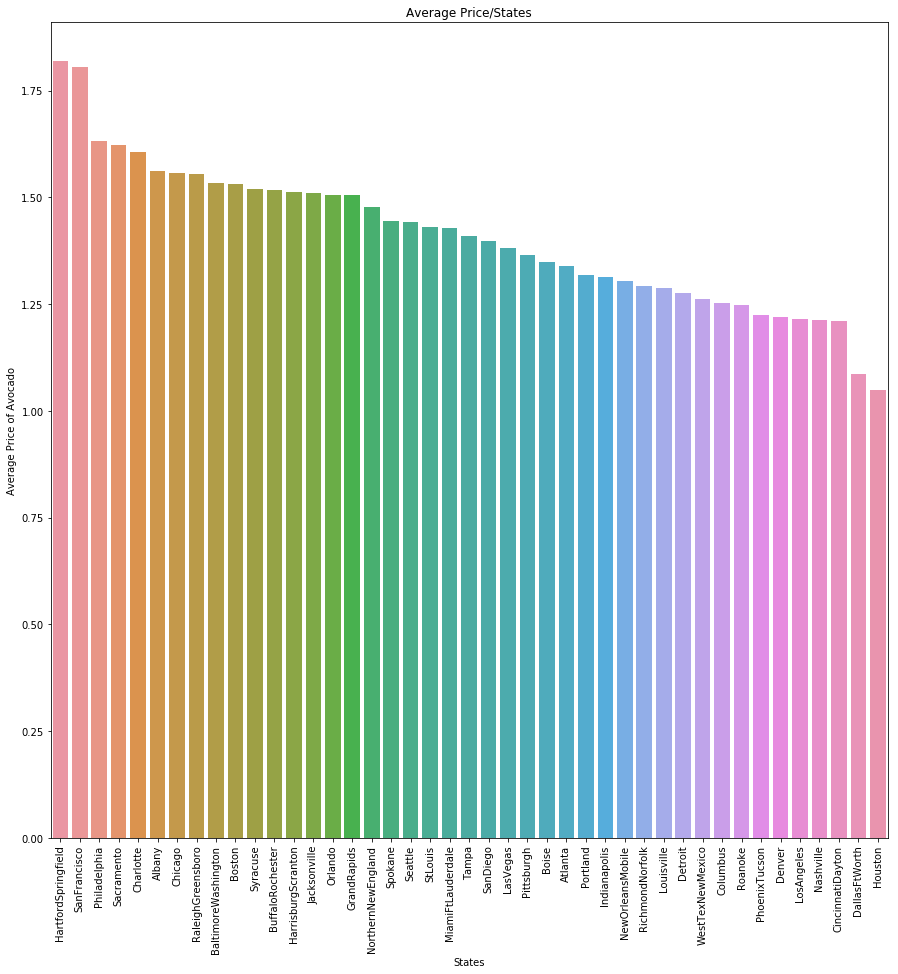

In [143]:
######## Lets Analyze the distribution of Avergae Price over all states #############
plt.figure(figsize=(15,15))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_averageprice_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('Average Price of Avocado')
plt.title('Average Price/States')

- Above graph show the distribution of average prices of all states.
- Hartford-Springfield, SanFrancisco, Philadelphia, Sacramento, Charlotte are the top five cities in which average price was higher(considering all 4 years) and the average price of Avocado was minimum in Houston.

Now let's check which type of avocado was more expensive and might be the cause for an increase in average price. The below-plotted bar graph will give more information on the same.

Years :-  [2015, 2016, 2017, 2018]
Conventional Avocados Average Price :-  [1.0821109123434725, 1.1050715563506255, 1.2963624396665214, 1.1306007751937983]
Organic Avocados Average Price :-  [1.6708411633109654, 1.5707558139534832, 1.7429995608256486, 1.568488372093023]


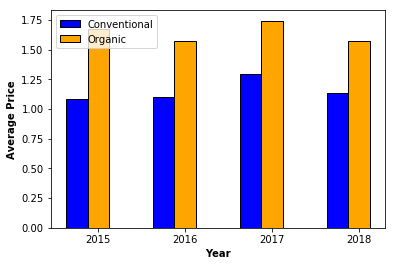

In [144]:
################### Plotting bar graph to find categorial distribution of average price ###################

######### Storing data of each year in different lists ##########
data_15=data[data.year==2015]
data_16=data[data.year==2016]
data_17=data[data.year==2017]
data_18=data[data.year==2018]
years = list(data.year.unique())
print("Years :- ",years)
data_15_con = data_15[data_15.type =='conventional'].AveragePrice.mean()
conventional_data = [float(data_15[data_15.type =='conventional'].AveragePrice.mean()),float(data_16[data_16.type =='conventional'].AveragePrice.mean()),float(data_17[data_17.type =='conventional'].AveragePrice.mean()),float(data_18[data_18.type =='conventional'].AveragePrice.mean())]
print("Conventional Avocados Average Price :- ",conventional_data)
organic_data = [float(data_15[data_15.type =='organic'].AveragePrice.mean()),float(data_16[data_16.type =='organic'].AveragePrice.mean()),float(data_17[data_17.type =='organic'].AveragePrice.mean()),float(data_18[data_18.type =='organic'].AveragePrice.mean())]
print("Organic Avocados Average Price :- ",organic_data)
###########################################
barWidth = 0.25
r1 = np.arange(len(conventional_data))
r2 = [x + barWidth for x in r1]
plt.bar(r1, conventional_data, color='blue', width=barWidth, edgecolor='black', label='Conventional')
plt.bar(r2, organic_data, color='orange', width=barWidth, edgecolor='black', label='Organic')
###
plt.xlabel('Year', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(conventional_data))], years)
plt.ylabel('Average Price', fontweight='bold')
###
plt.legend()
plt.show()

### Observation:-

1. This bar graph shows clearly that there was an increase in the price of avocado in both categories(Conventional and Organic) in 2017 and this was maximum as compared to any other year.

2. Above comparison between the average price of conventional and organic avocado also shows that the average price of organic avocados was always higher than the conventional and price difference between organic and conventional were maximum in 2015.


To check the effect of price rise on the consumption of the avocado, plotting total volume consumed 

Most consumed cities :-
---------------------
LosAngeles
DallasFtWorth
Houston
PhoenixTucson
WestTexNewMexico


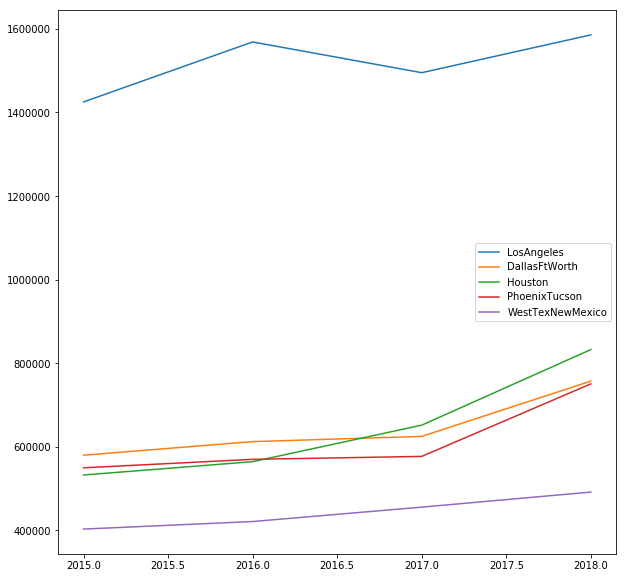

In [145]:
####### Distribution of total consumption of avocado in 5 states #############
data = data.rename(index=str, columns={"Total Volume" : "TotalVolume"})
area_list=list(data.region.unique())
unique_years = list(data.year.unique())
area_averageprice_ratio=[]
for i in area_list:
    x=data[data['region']==i]
    area_averageprice_rate=sum(x['TotalVolume'])/len(x)
    area_averageprice_ratio.append(area_averageprice_rate)
#area_averageprice_ratio = sorted(area_averageprice_ratio,reverse=True)
#print(area_averageprice_ratio)
df=pd.DataFrame({'area_list':area_list,'area_average_volume_ratio':area_averageprice_ratio})
new_index=df['area_average_volume_ratio'].sort_values(ascending=False).index.values
sorted_data=df.reindex(new_index)
plt.figure(figsize=(10,10))
test = []
print("Most consumed cities :-")
print("---------------------")
#print(sorted_data.area_list[int(sorted_data.index[0])])
for i in range(0,5):
    avg_column_cali= data[data["region"]==sorted_data.area_list[int(sorted_data.index[i])]]
    print(sorted_data.area_list[int(sorted_data.index[i])])
    #avg_column_cali = data[data["region"]==area_list[i]]                              
    #print(avg_column_cali)
    avg_per_year_cali = avg_column_cali.groupby('year').aggregate('mean')
    #data.year
    #print(avg_per_year_cali.AveragePrice)
    #print(avg_per_year_cali.TotalVolume)
    test.append(sorted_data.area_list[sorted_data.index[i]])
    plt.plot(unique_years,avg_per_year_cali.TotalVolume)
#print(test)
plt.legend(test)
plt.show()

### Observation :-

From the above graph, it can be concluded that the total volume consumed were maximum in Los Angeles. Although we got the top city in which the consumption of avocado was maximum, plotting the distribution graph of volume consumed in each state to have more understanding about the distribution in each state.

Text(0.5, 1.0, 'Average Volume Consume States')

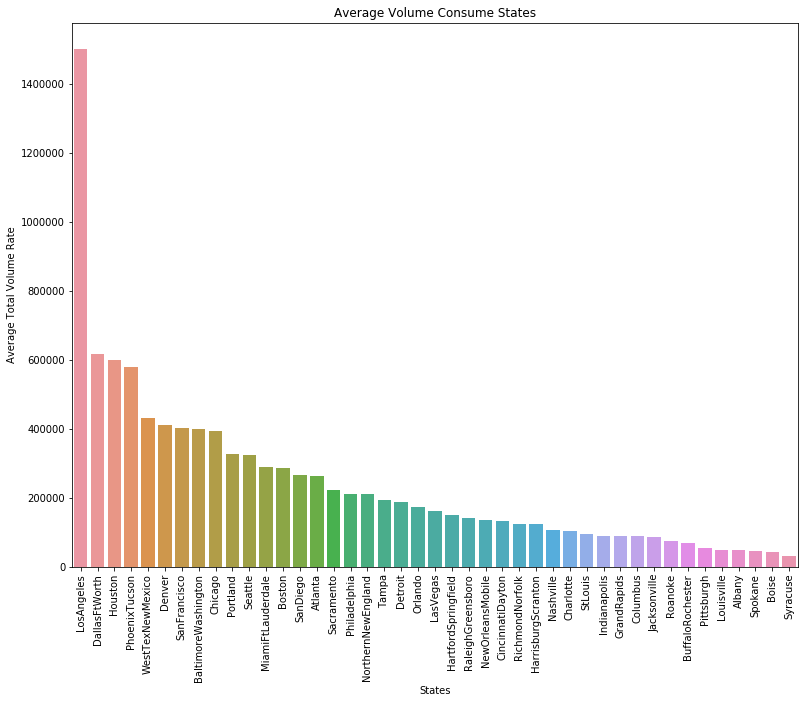

In [146]:
######## Lets Analyze the distribution of Avergae volume consumed over all states #############
plt.figure(figsize=(13,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_average_volume_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('Average Total Volume Rate')
plt.title('Average Volume Consume States')

### Observation :-

- Above Graph shows the distribution of the total volume over all states. From the above graph it can be concluded that the total volume consumed was very large in Los Angeles than any other states.
- Now let's analyze the overall volume distribution of Los Angeles in terms of 'Conventional' and 'Organic', to see which type of Avocados are getting sold more.

conventional    169
organic         152
Name: type, dtype: int64


Text(0.5, 1.0, 'Type of Distribution')

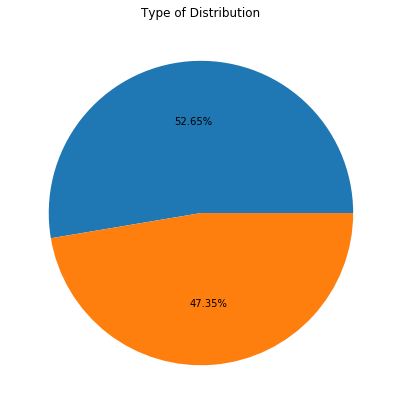

In [147]:
############### Plotting bar graph bar to see the categorial distribution in LosAngeles #################
data_LA = data[(data["region"]=="LosAngeles")& (data.AveragePrice<2)]
#print(data_LA)
print(data_LA.type.value_counts())
plt.figure(figsize=(7,7))
plt.pie(data_LA.type.value_counts(),autopct='%1.2f%%')
plt.title('Type of Distribution')

### Observation :-

- People in LosAngeles prefers conventional avocados over organic.

Now let's find the relation between different features of avocado using Heat Map.

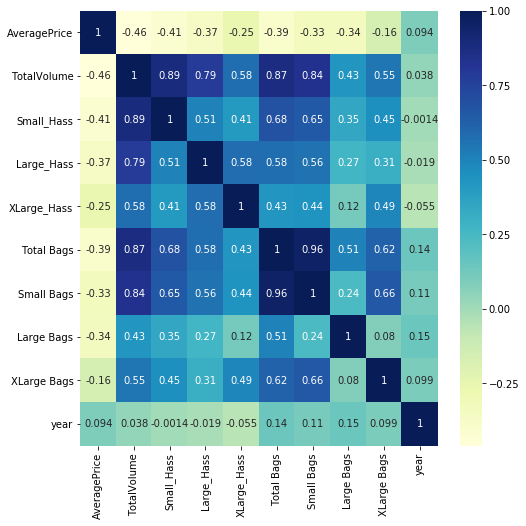

In [148]:
####### TO chek the relation between two features, plotting heatmap ############
heat_map=plt.subplots(figsize=(8,8))
heat_map = sns.heatmap(data.corr(),annot = True, cmap="YlGnBu")
plt.show()

### Observation :-

- Total Bags of Avocados sold were closely related more to small bags, XLarge bags, and Large bags respectively.
- Also, similar observation can be seen with respect to total volume consumed and small bags, XLarge bags and Large bags.
- Hence customers preferences can be concluded as :-  __small bags > XLarge bags > Large bags__

## 4. Preliminary Observation

From above all visualizations below things can be concluded:-

1. The average price of the Avocado was maximum in 2017. The prices were drastically increased from 2016 to 2017. In 2018 average prices of Avocado again dropped.
2. The average price was maximum in 'Hartford-Springfield' throughout the period and minimum in Houston.
3. It is also observed from the grouped bar graph that the average price of organic avocado was more than the conventional type avocado. This is true as the cost required for the manufacture of organic is more than the conventional and hence the average cost price of organic will be more than the conventional.
(Source:- https://www.foxnews.com/food-drink/10-reasons-organic-food-is-so-expensive)
4. From the Average volume ratio graph, it can be inferred that the average volume of avocado consumed by the customers is maximum in Los Angeles. Now in order check, whether the customer prefers organic or conventional avocado, I plotted the pie chart of the distribution of average volume consumed over avocado type for Los Angeles and found that customer prefers conventional avocado more than the organic avocados.
5. Possibly the reason why customer prefers conventional over organic may be the average price difference between these two types.
6. Customers prefer to buy small bags more than Xlarge and large bags.

## 5. Preprocessing of the data for the classification:-

1. Performing sampling to get the 12000 randomly from the whole dataset. In order to perform the classification, I am going to use the same sampled dataset.
2. Once the sampling is done, I will check for the outliers present in the data, in order to remove the same.
3. To check the presence of outliers, plotting boxplots with selected features.

(12000, 4)
Features considered for box-plot :- 
1 . AveragePrice
2 . TotalVolume
3 . Total Bags


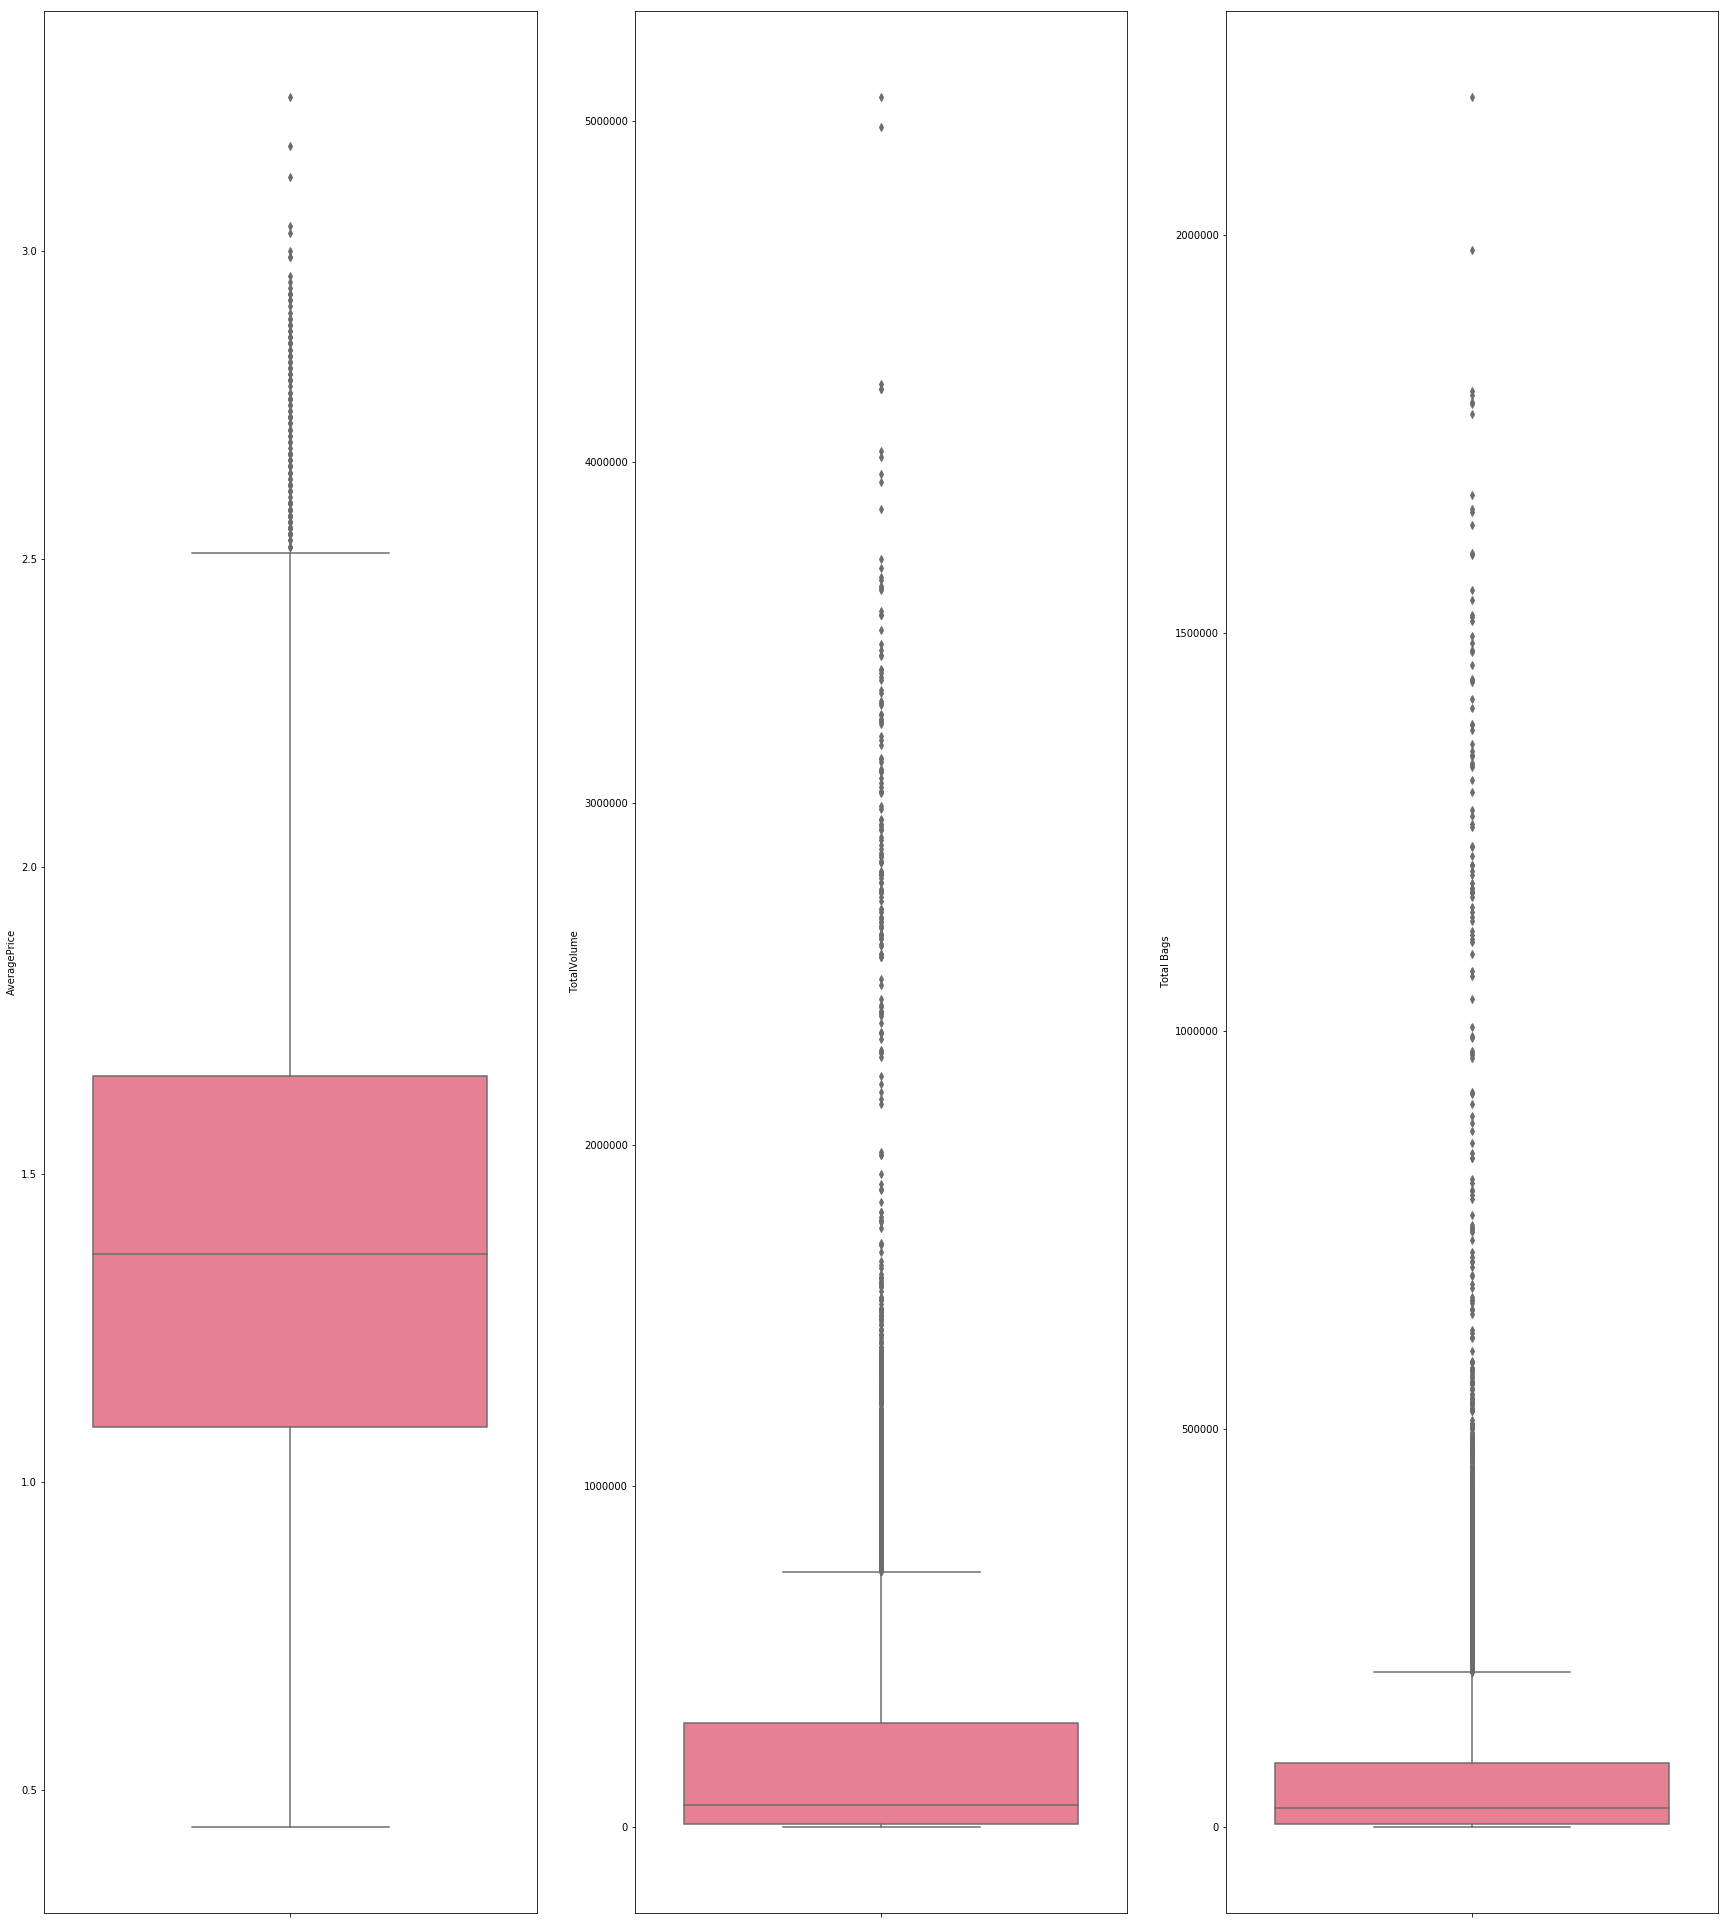

In [149]:
################# Sampling out 12000 data points and plotting box-plots on it ##################
data2 = data[['AveragePrice','TotalVolume','Total Bags','type']].copy()
data2 = data2.sample(12000)
print(data2.shape)
print("Features considered for box-plot :- ")
fig, axes =plt.subplots(1,3,figsize=(30,35))
for i in range (0,data2.shape[1]-1):
    #fig = plt.figure(figsize = (7, 7))
    print(i+1,".",data2.columns.values[i])
    sns.boxplot(y=str(data2.columns.values[i]),data=data2,ax=axes[i%3],palette = "husl")

In [150]:
######################### Function to remove outliers ##########################
def findOutliers(dataframe,column):
    #column = "total_rooms" 
    #housing[column].plot.box(figsize=(8,8))
    des = dataframe[column].describe()
    print("Description of :-",column,"\n --------------------------------")
    print(des)
    cummulative = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
    Quantile1 = des[cummulative['25']]
    Quantile3 = des[cummulative['75']]
    IQR = Quantile3-Quantile1
    lowerBound = Quantile1-1.5*IQR
    upperBound = Quantile3+1.5*IQR
    data = dataframe[(dataframe [column] < lowerBound) | (dataframe [column] > upperBound)]
    print("-------------------Removing outliers -----------------")
    #remove the outliers from the dataframe
    outlier = dataframe[~dataframe[column].isin(data[column])]
    return outlier

def norm(df, feature_name):
    #print(feature_name)
    temp_df = data2.copy()
    maxValue = data2[feature_name].max()
    minValue = data2[feature_name].min()
    temp_df[feature_name] = (data2[feature_name] - minValue) / (maxValue - minValue)
    #print(temp_df)
    return temp_df

### Preliminary Observation :- 

- As there are outliers present in the data, we need to remove the same before proceeding with the classification. 
- The above-mentioned method performs the task of removing outliers by calculating quantile boundaries for each column.
- Next step will be to convert the categorical target variable 'type' into -1,1. This is performed so that the same can be used while calculating the weight parameter in case of pocket algorithm of classification.

In [151]:
data2['type'].replace(['conventional','organic'],[-1,1],inplace=True)
print(data2.head())

       AveragePrice  TotalVolume  Total Bags  type
13807          1.45     19755.49    13001.52     1
3101           1.09    201142.55   101271.16    -1
8808           0.97    289527.53    94858.85    -1
13378          1.27      4261.47     3619.97     1
2501           1.15    134989.16    67846.05    -1


In [152]:
############# Removing the ouliers from population ######################
data2 = findOutliers(data2,"AveragePrice")
print(data2.shape)
############# Removing the ouliers from population ######################
data2 = findOutliers(data2,"TotalVolume")
data2 = findOutliers(data2,"TotalVolume")
data2 = findOutliers(data2,"TotalVolume")
print(data2.shape)
############# Removing the ouliers from population ######################
data2 = findOutliers(data2,"Total Bags")
print(data2.shape)

Description of :- AveragePrice 
 --------------------------------
count    12000.000000
mean         1.406711
std          0.412968
min          0.440000
25%          1.090000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64
-------------------Removing outliers -----------------
(11837, 4)
Description of :- TotalVolume 
 --------------------------------
count    1.183700e+04
mean     2.444148e+05
std      4.268140e+05
min      8.456000e+01
25%      8.454270e+03
50%      6.920073e+04
75%      3.103451e+05
max      5.070581e+06
Name: TotalVolume, dtype: float64
-------------------Removing outliers -----------------
Description of :- TotalVolume 
 --------------------------------
count     10833.000000
mean     146482.867508
std      192310.469482
min          84.560000
25%        7632.360000
50%       37079.860000
75%      234568.800000
max      762997.530000
Name: TotalVolume, dtype: float64
-------------------Removing outliers -------

Features considered for box-plot :- 
1 . AveragePrice
2 . TotalVolume
3 . Total Bags


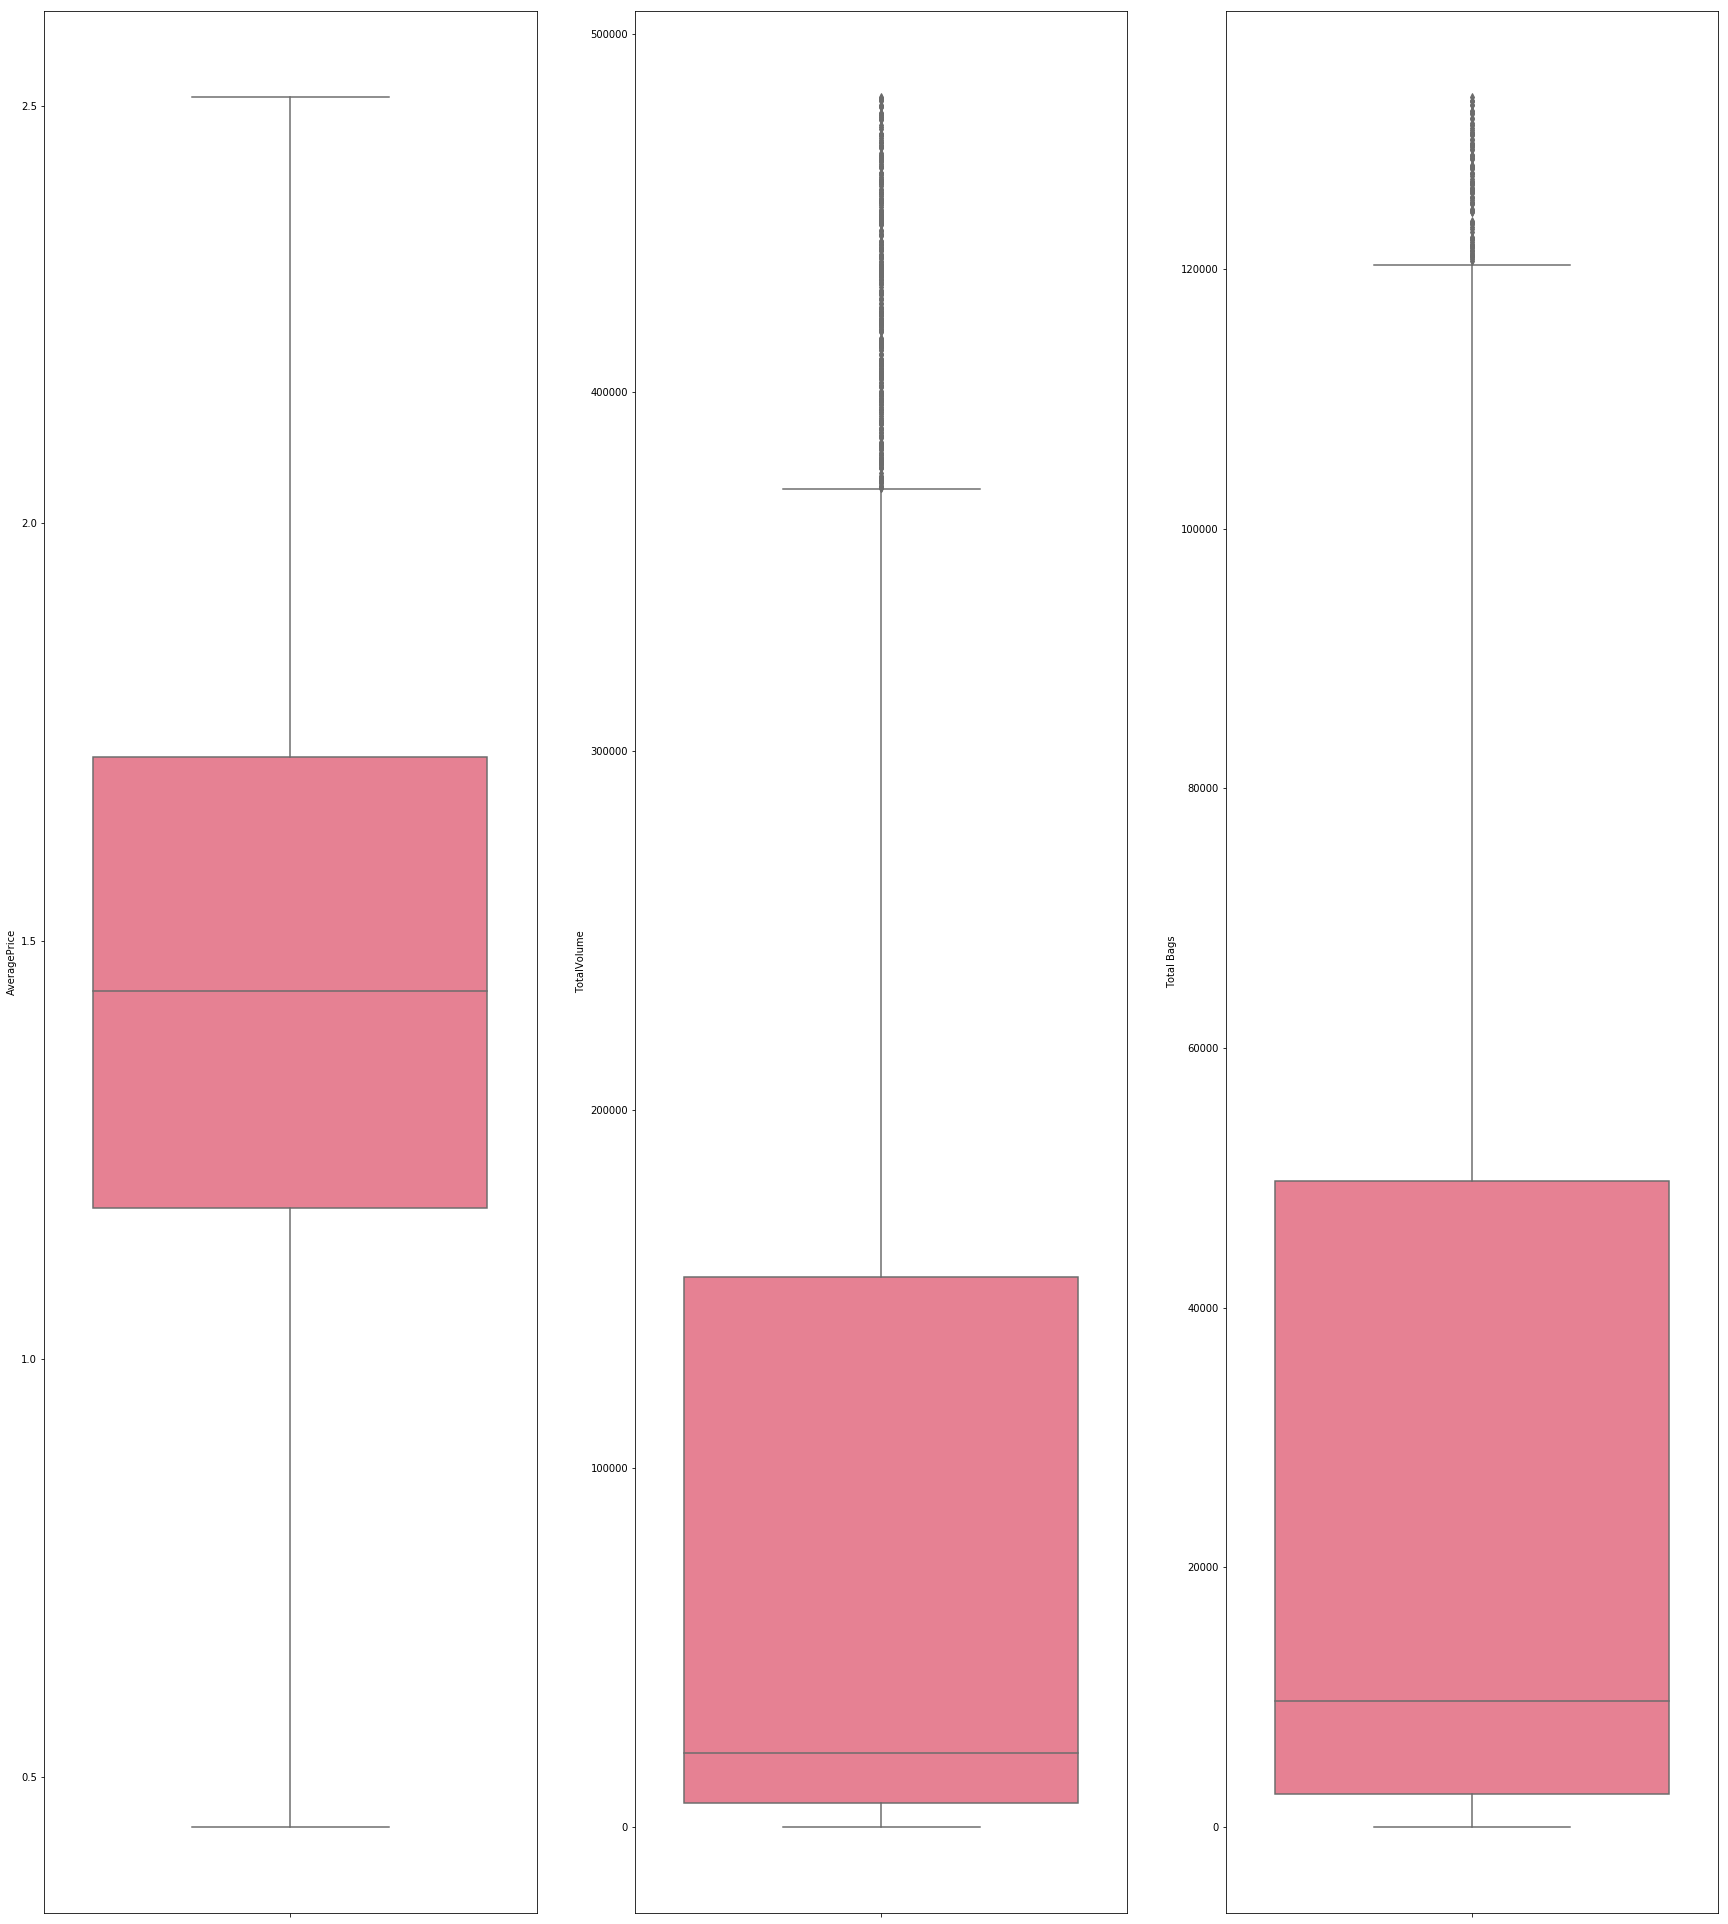

In [153]:
################# Representation of features after removal of the outliers ##################
print("Features considered for box-plot :- ")
fig, axes =plt.subplots(1,3,figsize=(30,35))
for i in range (0,data2.shape[1]-1):
    #fig = plt.figure(figsize = (7, 7))
    print(i+1,".",data2.columns.values[i])
    sns.boxplot(y=str(data2.columns.values[i]),data=data2,ax=axes[i%3],palette = "husl")

### Preliminary Observation :- 

1. We can clearly see the difference in two box plots, the one which we plotted before elimination of the outliers and one after outlier removal.
2. Box plot after removal of all outliers is much better than the previous one and hence our model will be more efficient on this data.
3. To have a more compact data range, we can use the rescaling method of the pre-processing and rescale the data in accordance with min and max value of the respective feature. So the next step will be to rescaling the data and check the effect on boxplots.    
(Source :- https://www.statisticshowto.datasciencecentral.com/normalized/)

In [154]:
print("--------------------- Before Rescaling -----------------------------------")
Temp_df = data2[['AveragePrice','TotalVolume','Total Bags']]

for i in range(len(Temp_df.columns.values)):
    print("Mean of ",Temp_df.columns.values[i],data2[Temp_df.columns.values[i]].mean())

print("---------------------- After Rescaling  -----------------------------------")
#print(data2.head())
for i in range(len(Temp_df.columns.values)):
    data2 = norm(data2,Temp_df.columns.values[i])
    print("Mean of ",Temp_df.columns.values[i],data2[Temp_df.columns.values[i]].mean())


--------------------- Before Rescaling -----------------------------------
Mean of  AveragePrice 1.4666670174700063
Mean of  TotalVolume 90460.2615838773
Mean of  Total Bags 27653.631788044655
---------------------- After Rescaling  -----------------------------------
Mean of  AveragePrice 0.49597440457488123
Mean of  TotalVolume 0.18742863448858219
Mean of  Total Bags 0.2075659508649312


# III. Method


### Summary of the classification models:-

#### 1. Pocket Algorithm :-

   - The Pocket algorithm is an extension of the perceptron algorithm of the classification. 
   - In the perceptron algorithm, we perform the iteration over all the training samples and each time we keep on updating the weights in such a way that it will give correct classification.
   - But in the pocket algorithm, best-derived weight is kept in $w_{pocket}$ vector. Every time after updating the current weight vector, it checks for the results that were yield by $w_{pocket}$ and if needed $w_{pocket}$ gets updated with newly generated weight vector.
   

#### 2. QDA(Quadratic Discriminant Analysis) Algorithm :-
   - QDA is Bayesian classifier. In the QDA, mu and sigma are calculated for each class in a target feature. This calculated mu and sigma are then used to do the classification on testing data.
   - For a dataset with two classes in the target variable, two discriminant functions are calculated and the decision boundary is placed where these discriminant functions meet in such a way that $\delta_1 == \delta_2$. 
   - Due to the quadratic nature of 𝛿 𝑘  function in terms of 𝑥, the decision boundary is quadratic. And hence We call this approach as **Quadratic Discriminant Analysis (QDA)**. 

#### 3. LDA(Linear Discriminant Analysis) Algorithm:-
   - LDA is also another type of Bayesian classifier. LDA is quite simple and produces a better result than the QDA. 
   - In the LDA, sigma value is not calculated in accordance with classes present in the target feature. Instead, only one sigma value is used, which depends on the whole test feature.
   - Simply using the same covariance for all the classes, we can reach the linear discriminant analysis model. By unifying the covariance matrix, we can remove the quadratic term in our discriminant function.
   
#### 4. Logistic Regression Algorithm :-
   - Logistic Regression uses the defined logistic function to find a model that fits with the target feature values.
   - When dealing with multiple classes, it can cause a masking problem that one class estimation is masked by other predictions.
   - A linear regression model that directly predicting $P(T=k \mid x)$ and not the class label $k$ is called as **Logistic Regression**.

## Explanation of codes

#### 1. Pocket Algorithm :-
 - Implementation of the Pocket algorithm contains mainly two methods, train, and use.
 - Train method is used to train our model. As we know, a pocket is an extension of a perceptron, implementation of a pocket algorithm is similar to that of Perceptron. But in the pocket, we always keep the best value of 'w'.
 - Weights are calculated in the training method and the same is updated with each training sample. The weight matrix is calculated with each training sample.
 - At each iteration, we use the 'compare' method to check if the current weight vector is better than the previous or not. We then store the best weight in w_pocket.
 - We implement our algorithm for multiple iterations so that at some point it will get converged and we will get an accurate weight vector, which predicts all the target values correctly.
 - In the use method, we are using the best w i.e. w_pocket to predict the target value.
 - Finally, we are calculating the confusion matrix for our algorithm using a method called 'confusion matrix'.
 
#### 2. QDA Algorithm:-
 - QDA class contains train and use methods which are used for training and the testing purpose.
 - In the training method of QDA class, mean and covariance for each class are calculated. This method also calculates, the prior probability of each class present in a target feature.
 - Once the train function runs required parameters such as mean, covariance and prior probability will get calculated. After this, the discriminant function is calculated for each target class using these values.
 - These calculated discriminant function values are then returned by the use method and further used to find the decision boundary between different classes.
 
#### 3. LDA Algorithm :-
   - LDA implementation is similar to the QDA algorithm but the only key difference is that - In the QDA, we calculate sigma parameter for each class, but in case of LDA we calculate sigma parameter only once.
   - Train method is used to calculate mu1,mu2, sigma,prior1, prior2 parameter with the help of train data.
   - In the use method, we are making use of these values to calculate discriminant functions. And with the use of these discriminant functions, we are deciding the decision boundary for our target feature.
   
#### 4. Logistic Regression Algorithm :-
   - It overrides the train and use the method. This class also has a softmax and g method as helper methods.
   - In the train method, weights are updated iteratively by using the derivative of softmax transformation. To perform this, we internally call g method by passing a feature vector and previously calculated weight. Then g makes a call to softmax method by giving dot product of feature vector and weight. Softmax method calculates the softmax function and returns it back to the step function.
   - Now in the next step, weight is updated with the help of actual value, alpha, feature vector, and the predicted value.
   - Once the training is completed, we use the latest updated weight parameter to predict target values in test data.

### A. Super Classs Definition

In [155]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.w = None
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### B. Pocket Class Implementation:-

In [156]:
class Pocket(Classifier): 
    def __init__(self):
        Classifier.__init__(self)
        self.w_pocket = None
        
    # train lease-squares model
    def train(self, X, T):
        
        def compare(X, T, w, wp):
            y = np.sign(X @ w)
            yp = np.sign(X @ wp)
            #print(y.shape,'------',yp.shape)
            #print(np.sum(y==T), '---------',np.sum(yp == T))
            return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
        
        def confusion_matrix(Y, T):  
            if len(Y) != len(T):
                raise ValueError("Wrong prediction and target length!")
            classes = np.unique(T)
            n_classes = len(classes)
            cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
            Tidx = [T == c for c in classes]
            #print(Tidx)
            for c in classes:
                pred_idx = Y == c
                #print(np.unique(pred_idx))
                cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]

            return cfm
        
        maxiter = 100
        alpha = 0.1
        N = X.shape[0]
        #print(N)
        X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))
        #print(X1.shape[1])
        # return 1 if w is better -1 if wp is bette            
        self.w = np.zeros(X1.shape[1]) 
        self.w_pocket = copy(self.w)
        
        for i in range(maxiter):
            converged = True
            correct_predict  = 0
            wrong_predict = 0
            if i == (maxiter/4) : print("---------------Iteration 25% completed with i = ",i,"-----------------") 
            if i == (maxiter/2) : print("---------------Iteration 50% completed with i = ",i,"-----------------")
            if i == (maxiter*3/4) : print("---------------Iteration 75% completed with i = ",i,"-----------------")
            for k in range(N):
                y = self.w @ X1[k]
                if np.sign(y) != np.sign(T[k]):
                    #print("In if .......\n")
                    #print(np.sign(y),np.sign(T[k]))
                    self.w += alpha * T[k] * X1[k]
                    converged = False
                    if compare(X1, T, self.w, self.w_pocket) > 0:
                        self.w_pocket[:] = self.w[:]
                        
            if converged:
                print("converged at ", i)
                break

        print("End of training: ", i)
    
        return self.w_pocket
    
    
    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)
        #print(self.w_pocket,'----',self.w)
        y_on_predict = X @ self.w_pocket
        #N = X.shape[0]
        #y_on_predict.shape = (N,1)
        #plt.plot(X1@self.w)
        return y_on_predict


### C. QDA Class Implementation:-

In [157]:
# QDA Class
from copy import deepcopy as copy
class QDA(Classifier):
    def __init__(self):
        Classifier.__init__(self)
        
    def train(self, X, T):
        t = T.groupby('type').size()
        print('---------- \nTotal 1 values :- ',t[1],'\nTotal -1 values :- ',t[-1])
        N1 = t[-1]
        N2 = t[1]
        N = N1+N2
        # ------------------------------------------------------------------------------------#
        self.mu1 = np.mean(X[:N1].values, 0)
        self.mu2 = np.mean(X[N1:].values, 0)
        self.Sigma1 = np.cov((X[:N1].values).T)
        self.Sigma2 = np.cov((X[N1:].values).T)
        self.prior1 = float(N1/ N)
        self.prior2 = float(N2/ N)
        print('mu1 - \n', self.mu1, '\nmu2 -\n',self.mu2,'\nSigma1 - \n',self.Sigma1,'\nSigma2 - \n',self.Sigma2,'\nprior1 -\n',self.prior1,'\nprior2 - \n',self.prior2)
        print(type(self.prior1))
    
    def use(self,X):
        self.d = []
        def QDA(X, mu, sigma, prior):
            sigma_inv = np.linalg.inv(sigma)
            #print(X.shape,mu.shape)
            diffv = X - mu
            return -0.5  * np.log(np.linalg.det(sigma)) \
            - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
            + np.log(prior)
        
        d1 = QDA(X.values, self.mu1, self.Sigma1, self.prior1)
        d2 = QDA(X.values, self.mu2, self.Sigma2, self.prior2)
        self.d.append(d1)
        self.d.append(d2)
        return self.d

### LDA Class Implementation:-

In [158]:
# LDA Class
from copy import deepcopy as copy
class LDA(Classifier):
    def __init__(self):
        Classifier.__init__(self)
        
    def train(self, X, T):
        t = T_total_sorted_train_LDA.groupby('type').size()
        print('---------- \nTotal 1 values :- ',t[1],'\nTotal -1 values :- ',t[-1])
        N1 = t[-1]
        N2 = t[1]
        N = N1+N2
        # ------------------------------------------------------------------------------------#
        self.mu1_LDA = np.mean(X[:N1].values, 0)
        self.mu2_LDA = np.mean(X[N1:].values, 0)
        
        self.Sigma_LDA = np.cov((X[:].values).T)
        
        self.prior1_LDA = float(N1/ N)
        self.prior2_LDA = float(N2/ N)
        print('mu1 - \n', self.mu1_LDA, '\nmu2 -\n',self.mu2_LDA,'\nSigma - \n',self.Sigma_LDA,'\nprior1 -\n',self.prior1_LDA,'\nprior2 - \n',self.prior2_LDA)
        print(type(self.prior1_LDA))
        
    def use(self,X):
        self.d = []
        
        def LDA(X, mu, sigma, prior):
            sigma_inv = np.linalg.inv(sigma)
            return np.sum(np.dot(X, sigma_inv) * mu \
                - 0.5 * np.dot(mu, sigma_inv) * mu \
                + np.log(prior), axis=1)
        
        d1 = LDA(X_total_QDA_test.values, self.mu1_LDA, self.Sigma_LDA, self.prior1_LDA)
        d2 = LDA(X_total_QDA_test.values, self.mu2_LDA, self.Sigma_LDA, self.prior2_LDA)
        self.d.append(d1)
        self.d.append(d2)
        return self.d

### Logistic Regression Class Implementation:-

In [159]:
from copy import deepcopy as copy
import IPython.display as ipd 
class LogisticRegression(Classifier): 
    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
    
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self,X, w):
        return self.softmax(X @ w) 
        
    
    def train(self, X, T):
        X = self.normalize(X)
       
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        
        self.w = np.random.rand(D+1, K)

        niter = 100
        X = self.add_ones(X)
        
        T = self.add_ones(T.reshape(-1,1))
        
        for step in range(niter):
                ys = self.g(X,self.w)
                self.w += self.alpha * X.T @ (T - ys)
                #ipd.clear_output(wait=True)
        #ipd.clear_output(wait=True)    
    
                
    
    # apply the learned model to data X
    def use(self, X):
        Xs = (X - self.meanX)/self.stdX
        Xs = self.add_ones(X)
        return self.g(Xs, self.w)

# IV. Experiments


#### A. Pocket Algorithm:-

- First I am splitting up the Training, Test data by taking feature values from a dataset.
- Once I split-up the data into $X\_train / T\_train$ and $X\_test$ / $T\_test$, I am passing $X\_train$ and $T\_train$ which is a training data to train method of the pocket class. Train method is returning the w_pocket vector which is getting calculated based on the feature values and the previous weight value.
- Once we get the best weight value, I am passing $X\_test$ feature vector set to use a method, which is predicting the target values and returning the same.
- In the next step, I am calculating the confusion matrix using predicted values and the actual target values.

In [160]:
##################################################################################################################
############################################## Pocket learning ###################################################
##################################################################################################################

def confusion_matrix(Y, T):  
            if len(Y) != len(T):
                raise ValueError("Wrong prediction and target length!")
            classes = np.unique(T)
            n_classes = len(classes)
            cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
            Tidx = [T == c for c in classes]
            #print(Tidx)
            for c in classes:
                pred_idx = Y == c
                #print(np.unique(pred_idx))
                cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]

            return cfm

X_total = data2[['AveragePrice','TotalVolume','Total Bags']].copy()
T_total = data2[['type']].copy()

########## Train data split ####################
X_train = X_total.iloc[0:1000].values
T_train = T_total.iloc[0:1000].values
unique, counts = np.unique(T_train, return_counts=True)
#print(unique,counts)
#########################################################
data_temp = data2[['AveragePrice','TotalVolume','Total Bags']].copy()
data_temp  = data2.sort_values(by='type')
unique1, counts1 = np.unique(data_temp.type, return_counts=True)
#print(unique1,counts1)
X_train_temp = data_temp[['AveragePrice','TotalVolume','Total Bags']]
X_train_temp_1 = X_train_temp[0:2000]
X_train_temp_2 = X_train_temp[6000:8000]
X_train_temp = np.vstack((X_train_temp_1.values,X_train_temp_2.values))
#print(X_train_temp)
#print(unique1,counts1)
T_train_temp = data_temp[['type']]
T_train_temp_1 = T_train_temp[0:2000]
T_train_temp_2 = T_train_temp[6000:8000]
T_train_temp = np.vstack((T_train_temp_1.values,T_train_temp_2.values))
#print(T_train_temp)
unique2, counts2 = np.unique(T_train_temp, return_counts=True)
#print(unique2,counts2)
#########################################################
print("Train Shape Check:", X_train_temp.shape, T_train_temp.shape)
########## Test data split #####################
X_test = X_total.iloc[8000:12000].values
T_test = T_total.iloc[8000:12000].values
print("Test Shape Check:", X_test.shape, T_test.shape)

Train Shape Check: (4000, 3) (4000, 1)
Test Shape Check: (1502, 3) (1502, 1)


### Training of Pocket Algorithm :-

- Previously, in the training of pocket algorithm I was passing X_train and T_train to calculate the w_pcoket paramter. But in the chosen dataset, values of -1 and 1 are not equally distributed and this was leading to wrong predictions.
- To overcome this issue, I figured out a way by passing equal number of -1 and 1 values so that calculated will be more accurate and will always hold the better value.
- Above mentioned method helped me to increase the accuracy and it worked more efficiently on testing data as well.

In [161]:
######## Train model using test data ###########
pckt = Pocket()
#w_from_Train = pckt.train(X_train, T_train)
w_from_Train = pckt.train(X_train_temp, T_train_temp)
#print("Calculated Weights are :- \n",w_from_Train)

---------------Iteration 25% completed with i =  25 -----------------
---------------Iteration 50% completed with i =  50 -----------------
---------------Iteration 75% completed with i =  75 -----------------
End of training:  99


### Testing of Pocket Algorithm :-

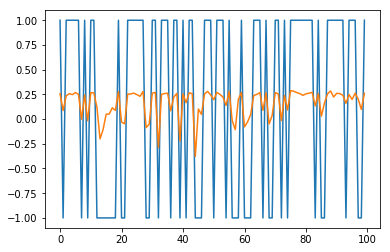

In [162]:
################# Testing using Pocket Algorithm ############
Y = pckt.use(X_test)
#print(Y.shape,T_test.shape)
plt.plot (T_test[:100])
plt.plot(Y[:100])
#print(np.unique(np.sign(Y)))
#print(np.min(Y))

### Evaluation metrics :- 

### Calculating Precision , Recall and F1 Score for our testing :-

In [163]:
from sklearn.metrics import precision_score, recall_score,f1_score,roc_curve

######## Confusion Matrix Calculation #####
cm2 = confusion_matrix(np.sign(Y),np.sign(T_test.flatten()))
print("Confusion Matrix - \n",cm2)

Confusion Matrix - 
      -1    1
-1  196    0
 1  400  906


In [164]:
Y = np.where(Y > 0,1,-1)
print("\n------- Now Calculating Precision, Recall and F1 Score ----------")
print("\n Precision:- {:.2f}%".format(100 * precision_score(T_test,np.sign(Y))))
print("\n Recall: {:.2f}%".format(100 * recall_score(T_test,np.sign(Y))))
print("\n F1 score: {:.2f}%".format(100 * f1_score(T_test,np.sign(Y))))


------- Now Calculating Precision, Recall and F1 Score ----------

 Precision:- 69.37%

 Recall: 100.00%

 F1 score: 81.92%


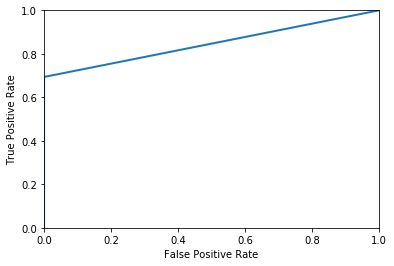

In [165]:
fpos, tpos, thre = roc_curve(np.sign(Y),T_test, pos_label=None)
plt.plot(fpos, tpos,linewidth=2, label= None)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

### Calculating Precision , Recall and F1 Score for our Training data :-

In [166]:
######## Confusion Matrix Calculation #####
Y_train = pckt.use(X_train_temp)
cm2 = confusion_matrix(np.sign(Y_train),np.sign(T_train_temp.flatten()))
print("Confusion Matrix - \n",cm2)
#Y = np.where(Y > 0,1,-1)
print("\n------- Now Calculating Precision, Recall and F1 Score ----------")
print("\n Precision:- {:.2f}%".format(100 * precision_score(T_train_temp,np.sign(Y_train))))
print("\n Recall: {:.2f}%".format(100 * recall_score(T_train_temp,np.sign(Y_train))))
print("\n F1 score: {:.2f}%".format(100 * f1_score(T_train_temp,np.sign(Y_train))))

Confusion Matrix - 
       -1     1
-1   734     0
 1  1266  2000

------- Now Calculating Precision, Recall and F1 Score ----------

 Precision:- 61.24%

 Recall: 100.00%

 F1 score: 75.96%


### Observation:-

- Accuracy of the algorithm on testing data is 64% where as on the training data is 55.41%. This is beacuse I have performed the spliting of the data into 80(training)/20(testing)% and hence I am testing on around 2000 data. And hence I am being able to achieve better accuracy in case of testing.
- The ROC curve is plotted with TPR(True Positive Rate) against the FPR(Flase Positive Rate) where TPR is on y-axis and FPR is on the x-axis.
- ROC(Receiver Operating Characteristic) curve plotted above shows that TPR and FPR are directly prportional to each other and increases linearly above 0.6

### B. QDA Algorithm :-
 - In the QDA implementation, I am sorting the data on basis of target vaiable(-1:- Conventional, 1:Organic) and then storing the same in new data-frame.
 - Once we are done with the sorting, I am separating out feature vector and target vectors and passing the same while doing the training part.

In [167]:
##################################################################################################################
############################################## QDA Implementation  ###################################################
##################################################################################################################
from mpl_toolkits.mplot3d import Axes3D
X_QDA = data2[['AveragePrice','TotalVolume','Total Bags','type']]
train_count = X_QDA.shape[0]-2025
print('--------------------------------- Training(data split) ------------------------------------ ')
X_QDA_train_total = X_QDA[:train_count]
T_total_QDA_train = X_QDA[['type']]
T_total_QDA_train = T_total_QDA_train[:train_count]
X_QDA_train_total = X_QDA_train_total.sort_values(by='type')
X_total_sorted_train = X_QDA_train_total[['AveragePrice','Total Bags','TotalVolume']]
T_total_sorted_train = X_QDA_train_total[['type']]
#print('\n Feature Vectors :- \n',X_total_sorted_train.head(),'\n\n Unique elements in Tareget feature and its count:- \n',T_total_sorted_test.groupby('type').size())

--------------------------------- Training(data split) ------------------------------------ 


### Training of QDA :-

- Here, I am passing previously calculated feature vector and the corrsponding target vector

In [168]:
############ QDA Training ##########
qda = QDA()
qda.train(X_total_sorted_train,T_total_sorted_train)

---------- 
Total 1 values :-  4594 
Total -1 values :-  2883
mu1 - 
 [0.37503372 0.4539377  0.44166975] 
mu2 -
 [0.57233863 0.05262781 0.02789182] 
Sigma1 - 
 [[ 0.01349503 -0.00103243 -0.00129082]
 [-0.00103243  0.04722854  0.03129154]
 [-0.00129082  0.03129154  0.05185457]] 
Sigma2 - 
 [[ 0.02708625 -0.00423226 -0.00152664]
 [-0.00423226  0.00669665  0.0025549 ]
 [-0.00152664  0.0025549   0.00128871]] 
prior1 -
 0.3855824528554233 
prior2 - 
 0.6144175471445767
<class 'float'>


### Splitting up the data for Testing
 
- Once the training is completed, we have the required sigma, mu and prior values according to the classes present in the target variable.
- Next step involves the splitting of the data for testing. Here as well I am following the same approach as that of used for the training.

In [169]:
print('--------------------------------- Testing(data split) ------------------------------------ ')
X_QDA_test_total = X_QDA[train_count:]
#print(X_QDA_test_total.shape)
X_total_QDA_test = X_QDA_test_total[['AveragePrice','Total Bags','TotalVolume']]
T_total_QDA_test = X_QDA_test_total[['type']]
X_QDA_test_total_sorted = X_QDA_test_total.sort_values(by='type')
T_total_sorted_test = X_QDA_test_total_sorted[['type']]
X_total_sorted_test = X_QDA_test_total_sorted[['AveragePrice','Total Bags','TotalVolume']]
t = T_total_sorted_test.groupby('type').size()
print('---------- \nTotal 1 values :- ',t[1],'\nTotal -1 values :- ',t[-1])
X_positive = X_total_sorted_test[t[-1]:]
X_negative = X_total_sorted_test[:t[-1]]
T_positive = T_total_sorted_test[t[-1]:]
T_negative = T_total_sorted_test[:t[-1]]
#print (T_negative)
#print(X_total_sorted_test.head(5),'\n------------------------- \n',T_total_sorted_test.head(5))
#t = T_total_sorted_test.groupby('type').size()
#print('---------- \nTotal 1 values :- ',t[1],'\nTotal -1 values :- ',t[-1]

--------------------------------- Testing(data split) ------------------------------------ 
---------- 
Total 1 values :-  1211 
Total -1 values :-  814


### Testing of QDA using calculated sigma, mu and prior value:-

In [170]:
######### QDA Testing #############
d = qda.use(X_total_QDA_test)
d1= d[0]
d2 = d[1]
#print(d.shape)
D = np.argmax(d,axis=0)
#print(d2)
#print(np.unique(D))
print("Shape of D - ",D.shape)

Shape of D -  (2025,)


### Plots for the QDA:-

Text(0.5, 0, 'QDA P(x|Class=k)\n from disc funcs')

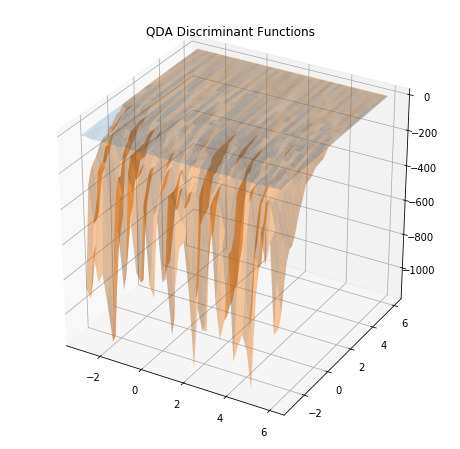

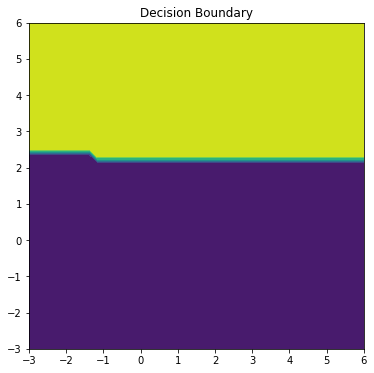

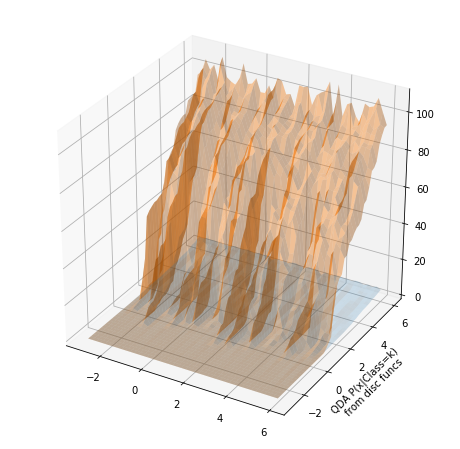

In [171]:
################### Plots for the QDA ####################

xs, ys = np.meshgrid(np.linspace(-3,6, 45), np.linspace(-3,6, 45))
#print(ys)
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(d1.reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(d2.reshape(xs.shape),0), alpha=0.4)
plt.title("QDA Discriminant Functions")

plt.figure(figsize=(6,6))
#plt.plot(X_positive, 'or')
#plt.plot(X_negative,'xb')
#print(X_positive.shape)
#plt.plot(X_negative, 'xb')
plt.contourf(xs, ys, (np.sort(d1-d2,0) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

prob1 = np.exp( np.sort(d1.reshape(xs.shape),0) - 0.5*X_QDA_train_total.shape[1]*np.log(2*np.pi) - np.log(qda.prior1))
prob2 = np.exp( np.sort(d2.reshape(xs.shape),0) - 0.5*X_QDA_train_total.shape[1]*np.log(2*np.pi) - np.log(qda.prior2))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)

plt.ylabel("QDA P(x|Class=k)\n from disc funcs", multialignment="center")

- Above graph shows the plot for d1 and d2 i.e the plot for Discriminant functions. Intersection of these Discriminant funstions are represented in the first graph.
- Second graph shows the decision boundary by plotting the contour with the help of both discriminant functions.

### Evaluation metrics :- 
#### Now Calculating Precision_Score, Recall_Score and F1_Score on Testing data:-

In [172]:
#### Calculation for Precison, Recall and F1 Score
from sklearn.metrics import precision_score, recall_score,f1_score,roc_auc_score
#D = np.where(D > 0,1,-1)
print("\n Precision: {:.2f}%".format(100 * precision_score(T_total_QDA_test,D,average='micro')))
print("\n Recall: {:.2f}%".format(100 * recall_score(T_total_sorted_test,D,average='micro')))
Precision_Score = 100 * precision_score(T_total_QDA_test,D,average='micro')
Recall_Score = 100 * recall_score(T_total_sorted_test,D,average='micro')
F1_Score = 2 * ((Precision_Score * Recall_Score) / (Precision_Score + Recall_Score))
print("\n F1 score: {:.2f}%".format(F1_Score))


 Precision: 57.43%

 Recall: 35.46%

 F1 score: 43.85%


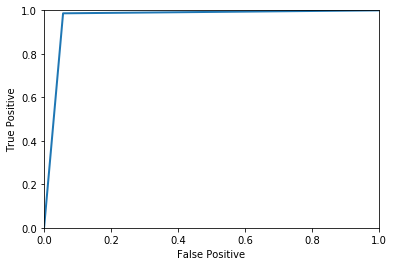

In [173]:
from sklearn.metrics import precision_score, recall_score,f1_score,roc_auc_score
falsepos, truepos, thresholds = roc_curve(D,T_total_QDA_test, pos_label=None)
plt.plot(falsepos, truepos,linewidth=2, label= None)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

#### Calculation for Precison, Recall and F1 Score on Training Data 

In [174]:
#### Calculation for Precison, Recall and F1 Score on Training Data #################
d_train = qda.use(X_total_sorted_train)
D_on_train = np.argmax(d_train,axis=0)
from sklearn.metrics import precision_score, recall_score,f1_score,roc_auc_score
#D = np.where(D > 0,1,-1)
print("\n Precision: {:.2f}%".format(100 * precision_score(T_total_sorted_train,D_on_train,average='micro')))
print("\n Recall: {:.2f}%".format(100 * recall_score(T_total_QDA_train,D_on_train,average='micro')))
Precision_Score = 100 * precision_score(T_total_QDA_train,D_on_train,average='micro')
Recall_Score = 100 * recall_score(T_total_sorted_train,D_on_train,average='micro')
F1_Score = 2 * ((Precision_Score * Recall_Score) / (Precision_Score + Recall_Score))
print("\n F1 score: {:.2f}%".format(F1_Score))


 Precision: 59.13%

 Recall: 36.35%

 F1 score: 45.02%


### Observation :-
- Above results shows that the value of precision is better in case of the testing data than the training data.
- But if we observe the precision and F1 score,difference between the testing and training data is not vary significant and hence it can be stated that the calculated values of sigma, covariance and prior suits for both training as well as testing examples.

#### Now Calculating confusion matrix for training and testing :-

1. Confusion Matrix for Testing:-

In [175]:
# Y = np.where(Y > 0,1,-1)
#rint(T_total_QDA_test.values.flatten().shape)
for i in range(len(D)):
    if D[i]==0:
        D[i]=-1
cfm = confusion_matrix(T_total_QDA_test.values.flatten(),D)
cfm

,-1,1
-1,798,16
1,48,1163


#### Observation :- 
   - Above confusion matrix shows the number of True_Positive, True_Negative, False_Positive an False_negative values predicted when we run our model on testing data. It clealy shows that the our model is correctly calculating the True_Positive, False_negative on testing data. And very less number of True_Negative and False_Positive predictions were made.
   - Now calculating confusion matrix on training data.
    
2. Confusion Matrix for Training :- 

In [176]:
for i in range(len(D_on_train)):
    if D_on_train[i]==0:
        D_on_train[i]=-1
cfm_train = confusion_matrix(T_total_QDA_train.values.flatten(),D_on_train)
cfm_train

,-1,1
-1,1122,1761
1,1876,2718


#### Observation :-
- Confusion matrix of training data shows the similar results as that of on testing data with approximately 50% correct target predicted values.

### C. LDA

- In the LDA implementation, I am sorting the data on basis of target vaiable(-1:- Conventional, 1:Organic) and then storing the same in new data-frame. This is the similar method that, I have implemented for the QDA.
- Once we are done with the sorting, I am separating out feature vector and target vectors and passing the same while doing the training part.
- Now First splitting the data for training and testing purpose and printing the training feature values as well as the count of number of samples in each target class.

### Splitting up the data for Training:-

In [177]:
##################################################################################################################
############################################## LDA Implementation  ###################################################
##################################################################################################################
from mpl_toolkits.mplot3d import Axes3D
X_LDA = data2[['AveragePrice','TotalVolume','Total Bags','type']]
print('--------------------------------- Training(data split) ------------------------------------ ')
X_LDA_train_total = X_LDA[:train_count]
T_total_LDA_train = X_QDA[['type']]
T_total_LDA_train = T_total_LDA_train[:train_count]
X_LDA_train_total = X_LDA_train_total.sort_values(by='type')
X_total_sorted_train_LDA = X_LDA_train_total[['AveragePrice','Total Bags','TotalVolume']]
T_total_sorted_train_LDA = X_LDA_train_total[['type']]
print('\n Feature Vectors :- \n',X_total_sorted_train_LDA.head(),'\n\n Unique elements in Tareget feature and its count:- \n',T_total_sorted_train_LDA.groupby('type').size())

--------------------------------- Training(data split) ------------------------------------ 

 Feature Vectors :- 
       AveragePrice  Total Bags  TotalVolume
2128      0.362319    0.291374     0.746480
1895      0.357488    0.462781     0.926565
9049      0.260870    0.413092     0.292994
856       0.352657    0.517156     0.484365
184       0.265700    0.058546     0.181513 

 Unique elements in Tareget feature and its count:- 
 type
-1    2883
 1    4594
dtype: int64


### Training of LDA :-

- Calling train method from the LDA class in order to calculate sigma, covariance and prior values using training data.

In [178]:
############ LDA Training ##########
lda = LDA()
lda.train(X_total_sorted_train_LDA,T_total_sorted_train_LDA)

---------- 
Total 1 values :-  4594 
Total -1 values :-  2883
mu1 - 
 [0.37503372 0.4539377  0.44166975] 
mu2 -
 [0.57233863 0.05262781 0.02789182] 
Sigma - 
 [[ 0.03106711 -0.02175919 -0.02077943]
 [-0.02175919  0.06047996  0.05297723]
 [-0.02077943  0.05297723  0.06134876]] 
prior1 -
 0.3855824528554233 
prior2 - 
 0.6144175471445767
<class 'float'>


### Splitting up the data for Testing

- Once the training is completed, we have the required sigma, mu and prior values according to the classes present in the target variable.
- Next step involves the splitting of the data for testing. Here as well I am following the same approach as that of used for the training.

In [179]:
######### LDA Testing Split#############
print('--------------------------------- Testing(data split) ------------------------------------ ')
X_LDA_test_total = X_LDA[train_count:]
#print(X_QDA_test_total.shape)
X_total_LDA_test = X_LDA_test_total[['AveragePrice','Total Bags','TotalVolume']]
T_total_LDA_test = X_LDA_test_total[['type']]
X_LDA_test_total_sorted = X_LDA_test_total.sort_values(by='type')
T_total_sorted_test_LDA = X_LDA_test_total_sorted[['type']]
X_total_sorted_test_LDA = X_LDA_test_total_sorted[['AveragePrice','Total Bags','TotalVolume']]
t = T_total_sorted_test_LDA.groupby('type').size()
print('---------- \nTotal 1 values :- ',t[1],'\nTotal -1 values :- ',t[-1])
X_positive = X_total_sorted_test_LDA[t[-1]:]
X_negative = X_total_sorted_test_LDA[:t[-1]]
T_positive = T_total_sorted_test_LDA[t[-1]:]
T_negative = T_total_sorted_test_LDA[:t[-1]]
#print (T_negative)
#print(X_total_sorted_test.head(5),'\n------------------------- \n',T_total_sorted_test.head(5))
#t = T_total_sorted_test.groupby('type').size()
#print('---------- \nTotal 1 values :- ',t[1],'\nTotal -1 values :- ',t[-1]

--------------------------------- Testing(data split) ------------------------------------ 
---------- 
Total 1 values :-  1211 
Total -1 values :-  814


### Testing of LDA using calculated sigma, mu and prior value:-

In [180]:
######### LDA Testing  #############
d2 = lda.use(X_total_LDA_test)
d1_LDA= d2[0]
d2_LDA = d2[1]
D_LDA = np.argmax(d2,axis=0)
#print(d2)
print("Shape of D :- ",D_LDA.shape)

Shape of D :-  (2025,)


### Plots for the LDA:-

Text(0.5, 0, 'QDA P(x|Class=k)\n from disc funcs')

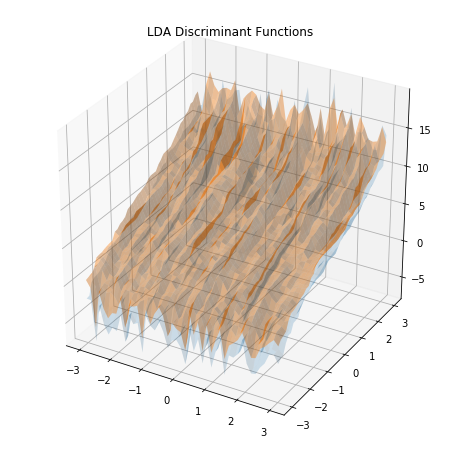

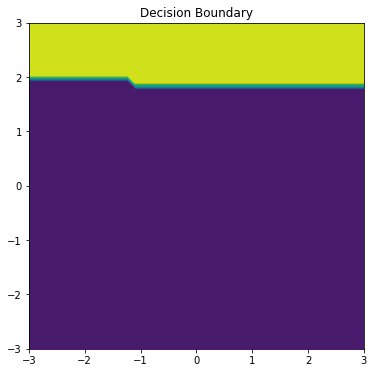

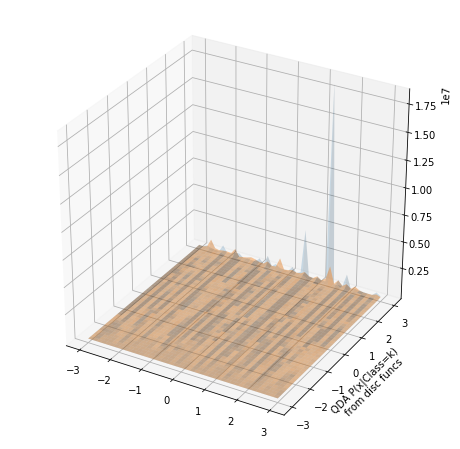

In [181]:
################### Plots for the LDA ####################

xs, ys = np.meshgrid(np.linspace(-3,3, 45), np.linspace(-3,3, 45))
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(d1_LDA.reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(d2_LDA.reshape(xs.shape),0), alpha=0.4)
plt.title("LDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (np.sort(d1_LDA-d2_LDA,0) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

prob1_LDA = np.exp( np.sort(d1_LDA.reshape(xs.shape),0) - 0.5*X_LDA_train_total.shape[1]*np.log(2*np.pi) - np.log(lda.prior1_LDA))
prob2_LDA = np.exp( np.sort(d2_LDA.reshape(xs.shape),0) - 0.5*X_LDA_train_total.shape[1]*np.log(2*np.pi) - np.log(lda.prior2_LDA))
ax.plot_surface(xs, ys, prob1_LDA, alpha=0.2)
ax.plot_surface(xs, ys, prob2_LDA, alpha=0.4)

plt.ylabel("QDA P(x|Class=k)\n from disc funcs", multialignment="center")

### Observation :-
- Above graph shows the plot for d1 and d2 i.e the plot for Discriminant functions. The intersection of these Discriminant functions are represented in the first graph.
- With the help of these discriminant functions contour is plotted. Decision boundary is calculated with the help of difference in the discriminant function and the same is responsible for the separation of the planes indicating two different classes of target features.

### Evaluation metrics :- 
#### Now Calculating Precision_Score, Recall_Score and F1_Score on Testing data:-

In [182]:
#### Calculation for Precison, Recall and F1 Score
from sklearn.metrics import precision_score, recall_score,f1_score,roc_auc_score
#D = np.where(D > 0,1,-1)
print("\n Precision: {:.2f}%".format(100 * precision_score(T_total_LDA_test,D_LDA,average='micro')))
print("\n Recall: {:.2f}%".format(100 * recall_score(T_total_sorted_test_LDA,D_LDA,average='micro')))
Precision_Score = 100 * precision_score(T_total_LDA_test,D_LDA,average='micro')
Recall_Score = 100 * recall_score(T_total_sorted_test_LDA,D_LDA,average='micro')
F1_Score = 2 * ((Precision_Score * Recall_Score) / (Precision_Score + Recall_Score))
print("\n F1 score: {:.2f}%".format(F1_Score))


 Precision: 59.65%

 Recall: 48.00%

 F1 score: 53.20%


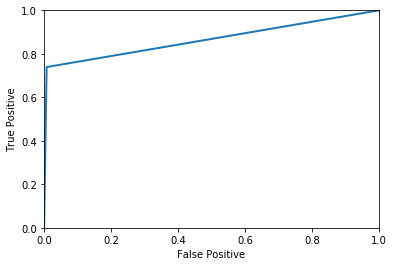

In [183]:
from sklearn.metrics import precision_score, recall_score,f1_score,roc_auc_score
falsepos, truepos, thresholds = roc_curve(D_LDA,T_total_LDA_test, pos_label=None)
plt.plot(falsepos, truepos,linewidth=2, label= None)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

#### Calculation for Precison, Recall and F1 Score on Training Data 

In [184]:
#### Calculation for Precison, Recall and F1 Score on Training Data #################

d_train = qda.use(X_total_sorted_train)
D_on_train = np.argmax(d_train,axis=0)
from sklearn.metrics import precision_score, recall_score,f1_score,roc_auc_score
#D = np.where(D > 0,1,-1)
print("\n Precision: {:.2f}%".format(100 * precision_score(T_total_sorted_train_LDA,D_on_train,average='micro')))
print("\n Recall: {:.2f}%".format(100 * recall_score(T_total_LDA_train,D_on_train,average='micro')))
Precision_Score = 100 * precision_score(T_total_sorted_train_LDA,D_on_train,average='micro')
Recall_Score = 100 * recall_score(T_total_LDA_train,D_on_train,average='micro')
F1_Score = 2 * ((Precision_Score * Recall_Score) / (Precision_Score + Recall_Score))
print("\n F1 score: {:.2f}%".format(F1_Score))


 Precision: 59.13%

 Recall: 36.35%

 F1 score: 45.02%


### Observation :-
- Above results shows that the value of precision is better on the testing data as compared to that of training data.

__Now Calculating confusion matrix for training and testing :-__

1. Confusion Matrix for the training :-

In [185]:
for i in range(len(D_LDA)):
    if D_LDA[i]==0:
        D_LDA[i]=-1
cfm = confusion_matrix(T_total_LDA_test.values.flatten(),D_LDA)
cfm

,-1,1
-1,388,426
1,3,1208


### Observation :-

- Above confusion matrix gives information about the number of True_Positive, True_Negative, False_Positive a False_negative values predicted, when we run our model on testing data. Our defined model is not as efficient on LDA as that is for QDA.
- Now calculating confusion matrix on training data.


2. Confusion Matrix for Training:-

In [186]:
for i in range(len(D_on_train)):
    if D_on_train[i]==0:
        D_on_train[i]=-1
cfm_train = confusion_matrix(T_total_LDA_train.values.flatten(),D_on_train)
cfm_train

,-1,1
-1,1122,1761
1,1876,2718


### Observation :-

- Accuracy of the QDA algorithm is better than that of LDA for the chosen dataset.

### D. Logistic Regression

- In the Logistic regression, I am splitting up the Train and test data using 'iloc' method and using the same for training and testing.
- Value of alpha is also very important in case of the logistic regression, I tried with multiple different alpha values in order to increase the accuracy of an algorithm.
- Below are the steps followed in the logistic regression implementation :-
    - Split data for Training and Testing of an algorithm,
    - Once we have the data for training and testing, I am callinf train method from LogisticRegression class to train our model.
        - Train method internally calls the g, softmax methods in order to calculate softmax function.
        - Once we pedict the target feature based on the feature values and weight, we update the weight parameter according to actual target value, alpha and the predicted value.
        - We keep on doing this for all the samples in traning set.
    - In the next step, I am calling use method to predict the target values in test dataset.
    - Finally, calculating the confusion matrix to check the accuracy of our model.

### Splitting up the data for Training:-

In [187]:
##################################################################################################################
############################################## Logistic Regression ###################################################
##################################################################################################################

########## Train data split ####################
X_train_ls = X_total.iloc[0:7000].values
T_train_ls = T_total.iloc[0:7000].values
T_train_lss = np.sort(T_train_ls)
#print(T_train_ls)
print("Train Shape Check:", X_train_ls.shape, T_train_ls.shape)

########## Test data split #####################
X_test_ls = X_total.iloc[7000:].values
T_test_ls = T_total.iloc[7000:].values
T_test_lss = np.sort(T_test_ls)
print("Test Shape Check:", X_test_ls.shape, T_test_ls.shape)

Train Shape Check: (7000, 3) (7000, 1)
Test Shape Check: (2502, 3) (2502, 1)


### Training and Testing of Logistic Regression:-

In [188]:
## 0000000009
lr = LogisticRegression(0.000000000001)
lr.train(X_train_ls[:],T_train_ls[:])
Y = lr.use(X_test_ls)

### Plots for the Logistic Regression:-

Accuracy:  58.6246270769156 %


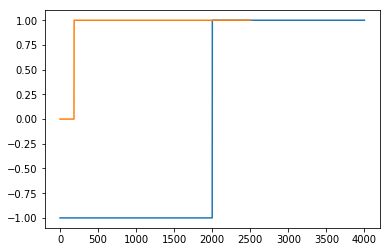

In [189]:
Yl = np.argmax(Y, 1)
#print(Y)
#print(np.size(Yl))
Tl=np.where(T_test_ls==-1,0,1)
#Yl[Yl == 0 ] = -1
#print((Tl))
#print((Yl))
plt.plot(np.sort(T_train_temp,0))
plt.plot(np.sort(Yl,0))

print("Accuracy: ", 100 - np.mean(np.abs(Tl - Yl)) * 100, "%")

[0]
Accuracy:  39.8880895283773 %


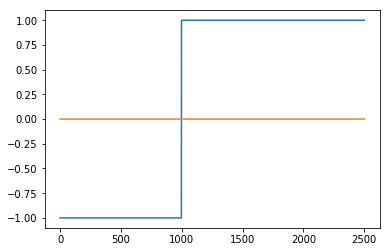

In [190]:
#0.0000001
lr = LogisticRegression(0.000000009)
w_from_train = lr.train(X_train_ls,T_train_ls)
#print(X_train_ls)
Y = lr.use(X_test_ls[:])
#print(Y)
#print(np.sign(Y),np.sign(T_test))

Yl = np.argmax(Y, 1)
Tl=np.where(T_test_ls==-1,0,1)
T_test_lss = np.sort(Tl)
print(np.unique(Yl))
plt.plot(np.sort(T_test_ls,0))
plt.plot(np.sort(Yl,0))
print("Accuracy: ", 100 - np.mean(np.abs(Tl - Yl)) * 100, "%")
#cm2 = confusion_matrix(np.sign(Y),np.sign(T_test))
#print(cm2)

Text(0.5, 1.0, 'Decision Boundary')

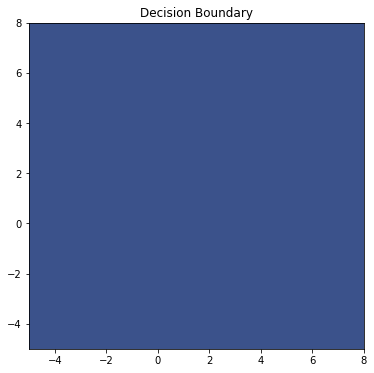

In [191]:
x = np.linspace(-5, 8, 38)
y = np.linspace(-5, 8, 38)

xs, ys = np.meshgrid(x, y)
plt.figure(figsize=(6,6))
plt.contourf(xs, ys, np.sort(Yl[0:1444].reshape(xs.shape)))
plt.title("Decision Boundary")

# plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
# plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

### Calculating accuracy on Training Data

(7000,)
Accuracy:  61.3774693877551 %


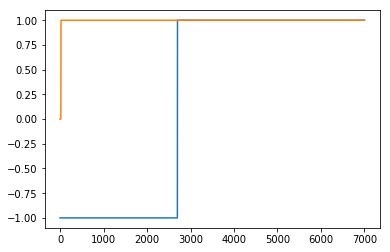

In [192]:
########## Result on Training Data ###############

## 0000000009
lr = LogisticRegression(0.0000000009)
lr.train(X_train_ls[:],T_train_ls[:])
Y_train = lr.use(X_train_ls)
Yl_train = np.argmax(Y_train, 1)
print(Yl_train.shape)
#print(Y)
#print(np.size(Yl))
Tl_train=np.where(T_train_ls==-1,0,1)
T_train_lss = np.sort(Tl_train)
#Yl[Yl == 0 ] = -1
#print((Tl))
#print((Yl))
plt.plot(np.sort(T_train_ls,0))
plt.plot(np.sort(Yl_train,0))

print("Accuracy: ", 100 - np.mean(np.abs(Tl_train - Yl_train)) * 100, "%")

C:\Users\jogle\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


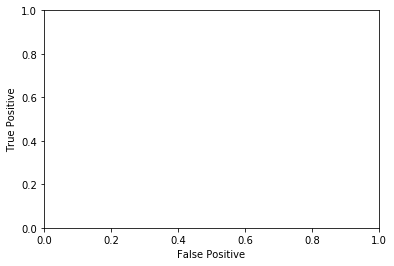

In [193]:
fpos, tpos, thresholds = roc_curve(Yl,Tl, pos_label=None)
plt.plot(fpos, tpos,linewidth=2, label= None)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

### Calculation for Confusion Matrix,Precison, Recall and F1 Score on Testing Data:-

In [194]:
for i in range(len(Yl)):
    if Yl[i]==0:
        Yl[i]=-1
cfm_test_lr = confusion_matrix(T_test_ls.flatten(),Yl)
cfm_test_lr

,-1
-1,998


In [195]:
#### Calculation for Precison, Recall and F1 Score on Testing Data #################
from sklearn.metrics import precision_score, recall_score,f1_score,roc_auc_score
#D = np.where(D > 0,1,-1)
print("\n Precision: {:.2f}%".format(100 * precision_score(T_test_lss,Yl,average='micro')))
print("\n Recall: {:.2f}%".format(100 * recall_score(T_test_ls,Yl,average='micro')))
Precision_Score = 100 * precision_score(T_test_lss,Yl,average='micro')
Recall_Score = 100 * recall_score(T_test_ls,Yl,average='micro')
F1_Score = 2 * ((Precision_Score * Recall_Score) / (Precision_Score + Recall_Score))
print("\n F1 score: {:.2f}%".format(F1_Score))


 Precision: 0.00%

 Recall: 39.89%

 F1 score: 0.00%


In [196]:
for i in range(len(Yl_train)):
    if Yl_train[i]==0:
        Yl_train[i]=-1
print(Yl_train.shape)
cfm_train_lr = confusion_matrix(T_train_ls.flatten(),Yl_train)
cfm_train_lr

(7000,)


,-1,1
-1,20,2679
1,0,4301


In [197]:
#### Calculation for Precison, Recall and F1 Score on Training Data #################
print("\n Precision: {:.2f}%".format(100 * precision_score(T_train_lss,Yl_train,average='micro')))
print("\n Recall: {:.2f}%".format(100 * recall_score(T_train_ls,Yl_train,average='micro')))
Precision_Score = 100 * precision_score(T_train_lss,Yl_train,average='micro')
Recall_Score = 100 * recall_score(T_train_ls.flatten(),Yl_train,average='micro')
F1_Score = 2 * ((Precision_Score * Recall_Score) / (Precision_Score + Recall_Score))
print("\n F1 score: {:.2f}%".format(F1_Score))


 Precision: 61.44%

 Recall: 61.73%

 F1 score: 61.59%


# IV. Experiments

### A. Discussion about evaluation metrics:-

- Evaluation metrics for each algorithm is calculated ans explained in details after each algorithm.
- By considering all the evaluation matrices, it can be inferred that accuracy of the logistic regression is high among all and least in case of QDA(56%)
- For the evaluation metrics, I have calculated confusion matrix for all the algorithms. Once we ave the information about True positive true negative, false positive, false negative values, we can easily calculate precision, recall and F1 score of each algorithm.
- I have calcualted precision, recall, F1 score for each algorithm. To check the efficiency, I also calculated the effect of my model on training dataset(data used to train each model).
- ROC is also plotted for each algorithm to have more understanding on efficiency.

### B. Discussion about train and test accuracies:-

- Accuracy of each algorithm for training as well as for testing is calculated after implementation of each algorithm.
- From the observation it seems that accuracy on training is more in most of the cases. Accuracy of pocket algorithms is more on testing data than the training data. This might be because of reason that, we are testing the efficiency of Pocket on smaller data and training data is more and hence it might be affecting the accuracy.
- The accuracy and precision of logistic regression seems to be the greatest. 


### C.Plots for result:-

I have plotted the graph for different algorithm after implementation of each algorithms

### D. Comparison

- Pocket algorithm works only on linearly seperable datasets as being a linear classification algorithm.
- Pocket algorithm works well for cases where linear classifier is required and logistic regression will not be useful.
- Efficiency of the pocket algorithm varies depending upon how large dataset is. Pocket algorithms takes maximum time for the implementation as compred with the other algorithms.
- QDA assumes a quadratic decision boundary and so it can be used to address wider range of problems than any other linear model.
- LDA can prove to be a better option for multiclass classification.
- Accuracy of these algorithms depends on the data distribution. In case of lineraly separable dataset Pokcet will perform efficiently and in case of binary calssification LDA and logistic regression seems to perform efficiently.

# Conclusions

Logistic and LDA seems to be performing more effectively for the chosen dataset.

QDA assumes a quadratic decision boundary and so it can be used to address wider range of problems than any other linear model.

Pocket Algorithm takes too much of time for the implementation as it always iterates through all available training data and also we have to run the same for multiple times to get converged.

LDA and QDA algorithm was relatively difficult to understand because of complicated mathematical equations. I had to take extra efforts to understand the same and implement it.

# References

1. Avocado Price Data, Retrieved from - https://www.kaggle.com/neuromusic/avocado-prices
2. Difference in logistic regression and perceptron Retrieved from - https://stats.stackexchange.com/questions/162257/whats-the-difference-between-logistic-regression-and-perceptron
3. LDA and QDA scikit documentation, Retrieved from - https://scikit-learn.org/stable/modules/lda_qda.html
4. Logistic Regression concept , Retrieved from - https://codesachin.wordpress.com/2015/08/16/logistic-regression-for-dummies/

# Extra Credit

* [OPT 1] Search for a ordinal data set and apply your classifiers to it. 
  - Repeat the experiments on it. 
  - Do you have different observation from previous results? 
  - Were you able to observe that we discussed in class about logistic regression? 
  - For a full extra credit point, you need to discuss all bullet points in Results section.     


* [OPT 2] Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.  

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 
Again, this is a **writing assignment**. Please don't forget to properly explain your codes and results using Markdown cell. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)